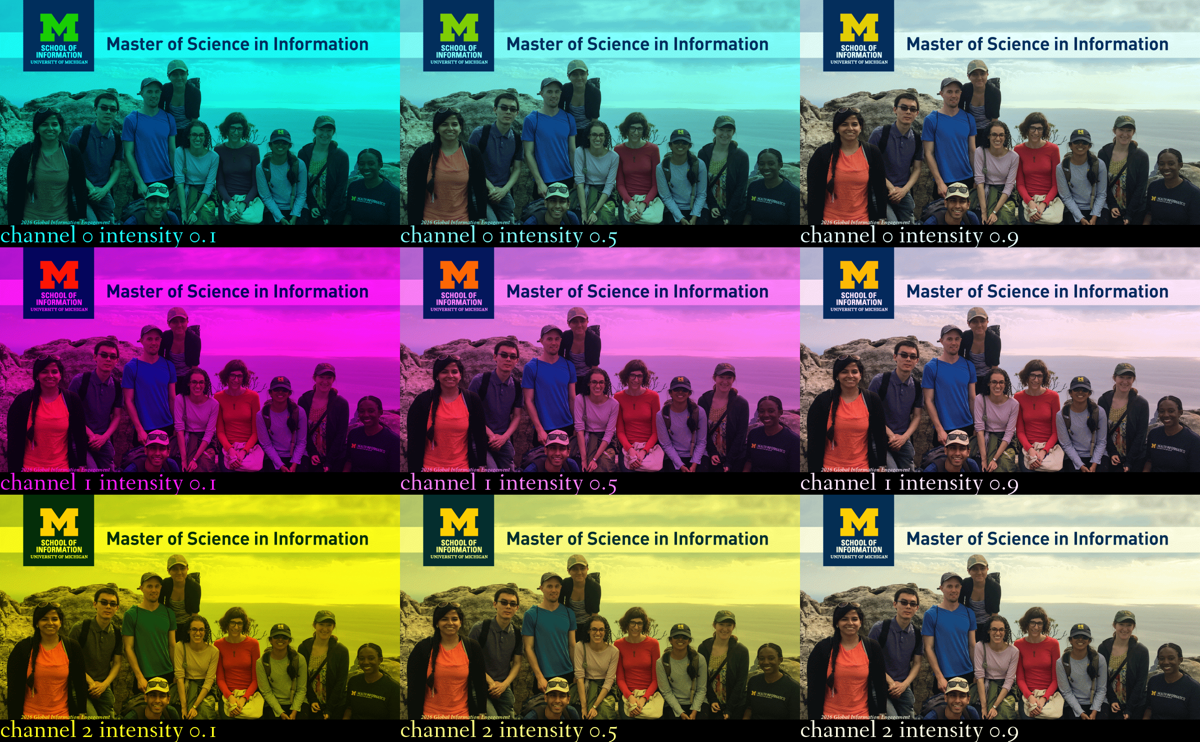

In [9]:
import PIL
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

image = Image.open("msi_recruitment.gif")
font = ImageFont.truetype('fanwood-webfont.ttf',50)
image = image.convert('RGB')
x = 0
y = 0
images = []

for i in range(3):
    for j in ([0.1,0.5,0.9]):     
        img = PIL.Image.new(image.mode, (image.width,int(image.height*1.1)))
        img.paste(image, (x, y) )
        
        draw = ImageDraw.Draw(img) 
        draw.text((0,image.height),"channel "+ str(i) + " intensity "+ str(j), font=font, fill = (255,255,255))
        
        img = img.convert('RGB')
        r,g,b = img.split()
        
        if i == 0:
            r = r.point(lambda z: z*j)            
        if i == 1:
            g = g.point(lambda z: z*j)
        if i == 2:
            b = b.point(lambda z: z*j)
            
        out_wh_image = Image.merge("RGB", (r, g, b))
        images.append(out_wh_image)        


first_image = images[0]
contact_sheet= PIL.Image.new(image.mode, (first_image.width*3,first_image.height*3))

for i in images:
    contact_sheet.paste(i, (x, y) )
    if x+first_image.width == contact_sheet.width:
        x = 0
        y = y+first_image.height
    else:
        x = x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)